TEAM ID: PTID-CDS-JAN-24-1772
PROJECT ID: PRCP-1024-TexasSalaryPred
PROBLEM STATEMENT
Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the Texas state government team to know the payroll information of employees of the state of Texas.

Task 3:-

- Who are the outliers in the salaries?
- What departments/roles have the biggest wage disparities between managers and employees?
- Have salaries and total compensations for some roles/ departments/ head-count changed over time

IMPORTING THE BASIC LIBRARIES


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

IMPORTING THE DATASET


In [2]:
data = pd.read_csv("./data/salary.csv")
data.head(5)

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


BASIC CHECKS

In [3]:
rows, col = data.shape
print ("Dimensions of dataset: {}" . format (data.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (149481, 21)
Rows: 149481 
Columns: 21


In [4]:
data.tail(5)

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,...,12.93,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN
149480,809,STATE PRESERVATION BOARD ...,ZUNKER,GEORGIA,P,0130,CUSTOMER SERVICE REP I ...,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,...,11.74,20.0,1017.46,12209.52,103583,NaN,NaN,NaN,NaN,NaN


In [5]:
data.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [6]:
# showing datatypes

data.dtypes

AGENCY                       int64
AGENCY NAME                 object
LAST NAME                   object
FIRST NAME                  object
MI                          object
CLASS CODE                  object
CLASS TITLE                 object
ETHNICITY                   object
GENDER                      object
STATUS                      object
EMPLOY DATE                 object
HRLY RATE                  float64
HRS PER WK                 float64
MONTHLY                    float64
ANNUAL                     float64
STATE NUMBER                 int64
duplicated                  object
multiple_full_time_jobs    float64
combined_multiple_jobs      object
summed_annual_salary       float64
hide_from_search            object
dtype: object

In [7]:
# Basic information about the features

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [8]:
# Statistical analysis of the dataset

data.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


In [9]:
# unique values

data.nunique().to_frame().T

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,113,113,38675,23559,27,1481,1422,6,2,11,...,206,58,40552,40554,149465,1,1,1,15,1


In [10]:
# Normalizing the Agency Name insted of the string values
data['AGENCY NAME'].value_counts(normalize= True)

AGENCY NAME
HEALTH AND HUMAN SERVICES COMMISSION                  0.245295
TEXAS DEPARTMENT OF CRIMINAL JUSTICE                  0.240338
TEXAS DEPARTMENT OF TRANSPORTATION                    0.087630
DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES          0.084211
DEPARTMENT OF PUBLIC SAFETY                           0.067547
                                                        ...   
HEALTH PROFESSIONS COUNCIL                            0.000047
BOARD OF PROFESSIONAL GEOSCIENTISTS                   0.000033
OFFICE OF STATE PROSECUTING ATTORNEY                  0.000027
BOARD OF PROFESSIONAL LAND SURVEYING                  0.000027
TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL             0.000007
Name: proportion, Length: 113, dtype: float64

In [11]:
# Normalizing the Gender insted of the string values
data.GENDER.value_counts(normalize= True)

GENDER
FEMALE             0.570828
MALE               0.429172
Name: proportion, dtype: float64

In [12]:
# Normalizing the STATUS insted of the string values
data.STATUS.value_counts(normalize= True)

STATUS
CRF - CLASSIFIED REGULAR FULL-TIME          0.953312
URF - UNCLASSIFIED REGULAR FULL-TIME        0.015808
CRP - CLASSIFIED REGULAR PART-TIME          0.010242
CTF - CLASSIFIED TEMPORARY FULL-TIME        0.007332
URP - UNCLASSIFIED REGULAR PART-TIME        0.006355
ERF - EXEMPT REGULAR FULL-TIME              0.006175
CTP - CLASSIFIED TEMPORARY PART-TIME        0.000542
UTP - UNCLASSIFIED TEMPORARY PART-TIME      0.000140
UTF - UNCLASSIFIED TEMPORARY FULL-TIME      0.000080
ERP - EXEMPT REGULAR PART-TIME              0.000007
CTP - CLASSIFIED TEMPORARY FULL-TIME        0.000007
Name: proportion, dtype: float64

EXPLORATORY DATA ANALYSIS

In [13]:
data.rename({'AGENCY':'agency', 'AGENCY NAME': 'agency_name', 'LAST NAME': 'last_name', 'FIRST NAME': 'first_name', 'MI': 'mi', 'CLASS CODE': 'class_code',
       'CLASS TITLE': 'class_title', 'ETHNICITY': 'ethnicity', 'GENDER': 'gender', 'STATUS': 'status', 'EMPLOY DATE': 'employ_date',
       'HRLY RATE': 'hrly_rate', 'HRS PER WK':'hrs_per_wk', 'MONTHLY': 'monthly', 'ANNUAL': 'annual', 'STATE NUMBER':'state_number'}, axis= 1, inplace= True)

In [14]:
# Data after renaming the columns
data.columns

Index(['agency', 'agency_name', 'last_name', 'first_name', 'mi', 'class_code',
       'class_title', 'ethnicity', 'gender', 'status', 'employ_date',
       'hrly_rate', 'hrs_per_wk', 'monthly', 'annual', 'state_number',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [15]:
target_column = 'annual'
independent_features = [column for column in data.drop(target_column, axis=1)]
independent_features

['agency',
 'agency_name',
 'last_name',
 'first_name',
 'mi',
 'class_code',
 'class_title',
 'ethnicity',
 'gender',
 'status',
 'employ_date',
 'hrly_rate',
 'hrs_per_wk',
 'monthly',
 'state_number',
 'duplicated',
 'multiple_full_time_jobs',
 'combined_multiple_jobs',
 'summed_annual_salary',
 'hide_from_search']

In [16]:
# create a Dataframe
df = pd.DataFrame(data)

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: ['agency_name', 'last_name', 'first_name', 'mi', 'class_code', 'class_title', 'ethnicity', 'gender', 'status', 'employ_date', 'duplicated', 'combined_multiple_jobs', 'hide_from_search']
Numerical columns: ['agency', 'hrly_rate', 'hrs_per_wk', 'monthly', 'annual', 'state_number', 'multiple_full_time_jobs', 'summed_annual_salary']


UNIVARIATE ANALYSIS


Analysis of categorial features:

In [17]:
categorical_columns

['agency_name',
 'last_name',
 'first_name',
 'mi',
 'class_code',
 'class_title',
 'ethnicity',
 'gender',
 'status',
 'employ_date',
 'duplicated',
 'combined_multiple_jobs',
 'hide_from_search']

In [18]:
# Among the categorical features, certain sub-categories of features are taken for checking the count such as follows:
# ethnicity, gender, status, duplicated, combined_multiple_jobs, hide_from_search, multiple_full_time_jobs

In [19]:
categorial_data = data[['ethnicity', 'gender', 'status', 'duplicated', 'combined_multiple_jobs', 'hide_from_search','multiple_full_time_jobs']]

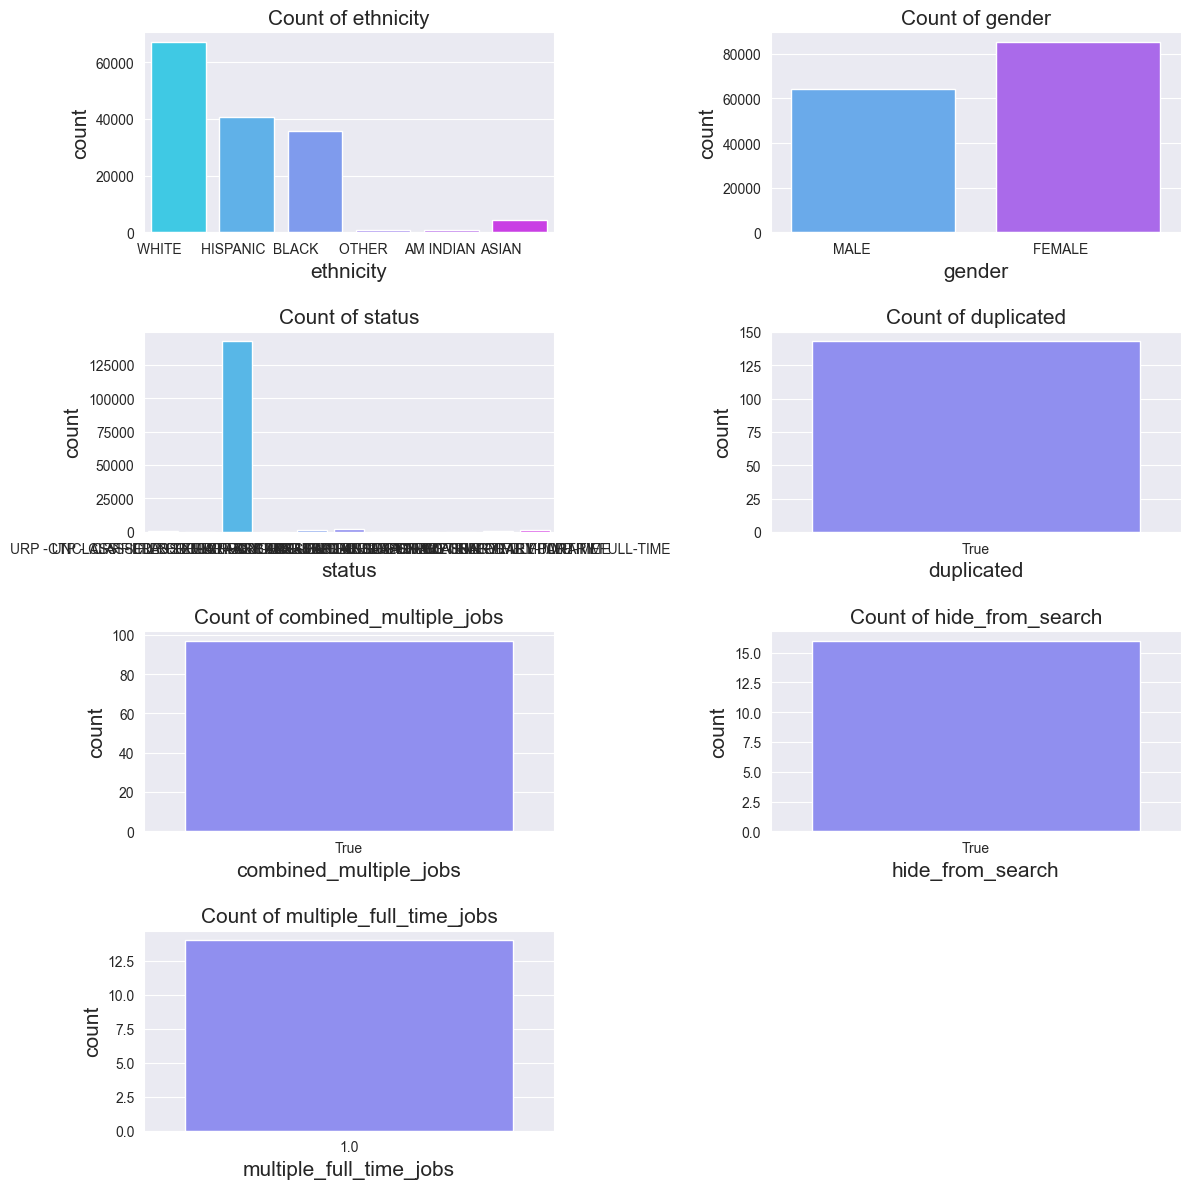

In [20]:
plt.figure(figsize= (12, 12))
sns.set_style('darkgrid')
plotnumber = 1

for column in categorial_data:
    if plotnumber <8:
        ax= plt.subplot(4, 2, plotnumber)
        sns.countplot(data=categorial_data, x=column, palette='cool').set_title(f'Count of {column}', fontsize= 15)
        plt.xlabel(column, fontsize=15)
        plt.ylabel('count', fontsize=15)
    plotnumber+=1
plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

Analysis of continuous features:

In [21]:
numerical_columns

['agency',
 'hrly_rate',
 'hrs_per_wk',
 'monthly',
 'annual',
 'state_number',
 'multiple_full_time_jobs',
 'summed_annual_salary']

In [22]:
continuous_data = data[['state_number','summed_annual_salary', 'monthly', 'agency', 'hrly_rate', 'hrs_per_wk']]

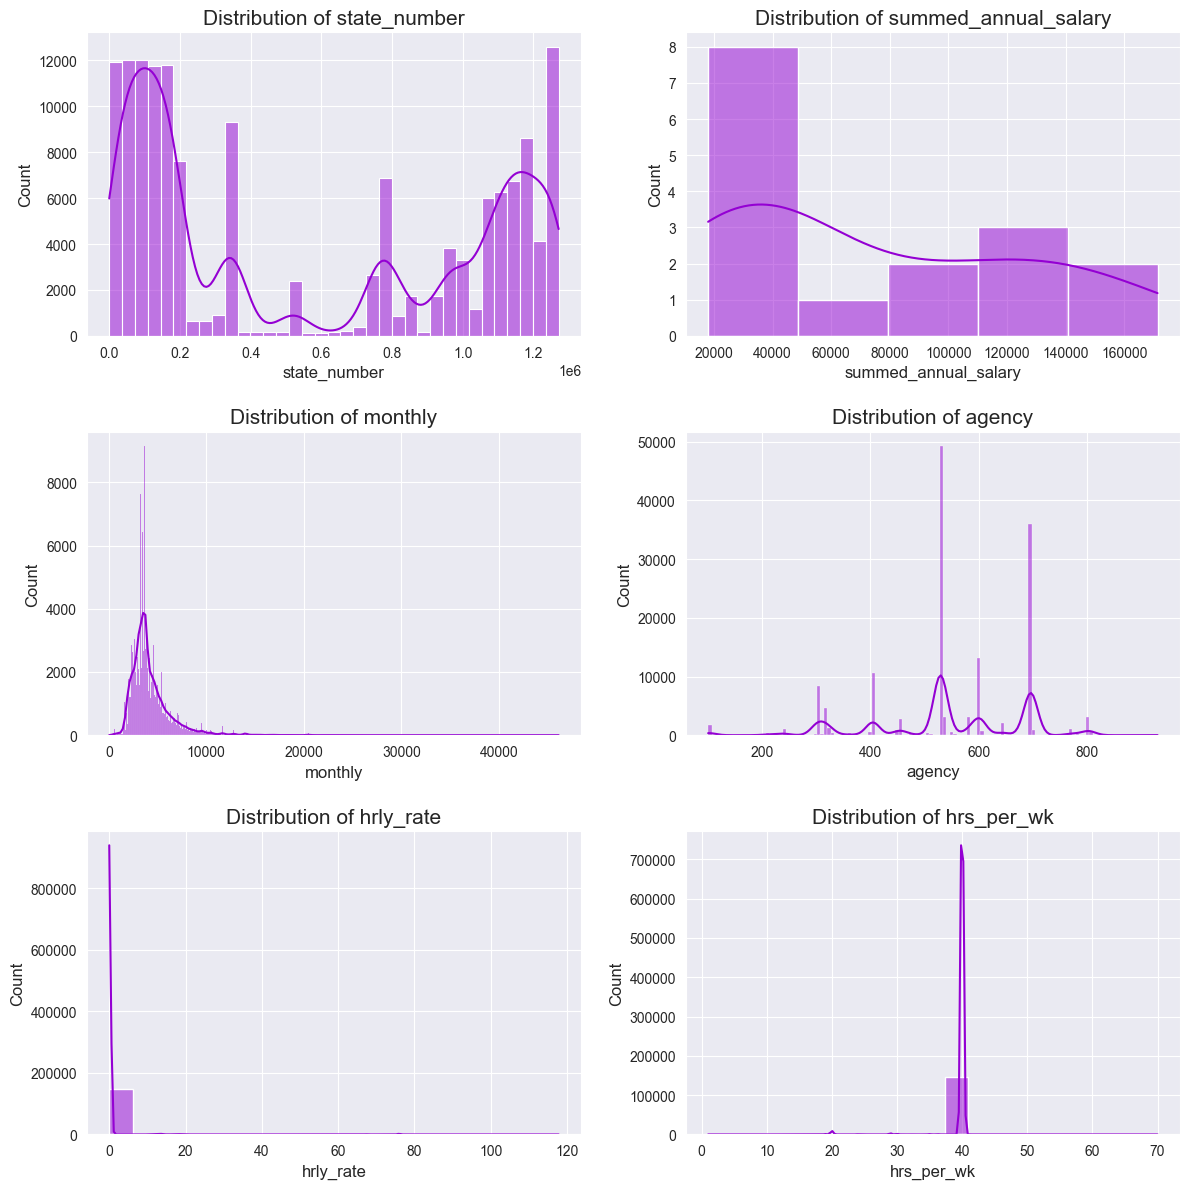

In [23]:
# histplot to analyse the distribution of continuous independent features
plt.figure(figsize= (12, 12))

sns.set_style('darkgrid')
plotnumber= 1

for column in continuous_data:
    if plotnumber <=6:
        ax= plt.subplot(3, 2, plotnumber)
        sns.histplot(x=continuous_data[column], color='darkviolet', kde=True)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Count', fontsize= 12)
        plt.title(f'Distribution of {column}', fontsize= 15)
    plotnumber+=1
plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

BIVARIATE ANALYSIS


In [24]:
continuous_data

,state_number,summed_annual_salary,monthly,agency,hrly_rate,hrs_per_wk
0,127717,131407.08,9545.82,241,75.96150,29.0
1,127717,NaN,1404.77,212,81.04454,4.0
2,59115,131407.08,9545.82,241,75.96150,29.0
3,59115,NaN,1404.77,212,81.04453,4.0
4,165030,NaN,3284.27,696,0.00000,40.0
...,...,...,...,...,...,...
149476,770781,NaN,2899.00,809,0.00000,40.0
149477,847431,NaN,5500.00,809,0.00000,40.0
149478,34266,NaN,1120.60,809,12.93000,20.0
149479,123490,NaN,5744.16,809,0.00000,40.0


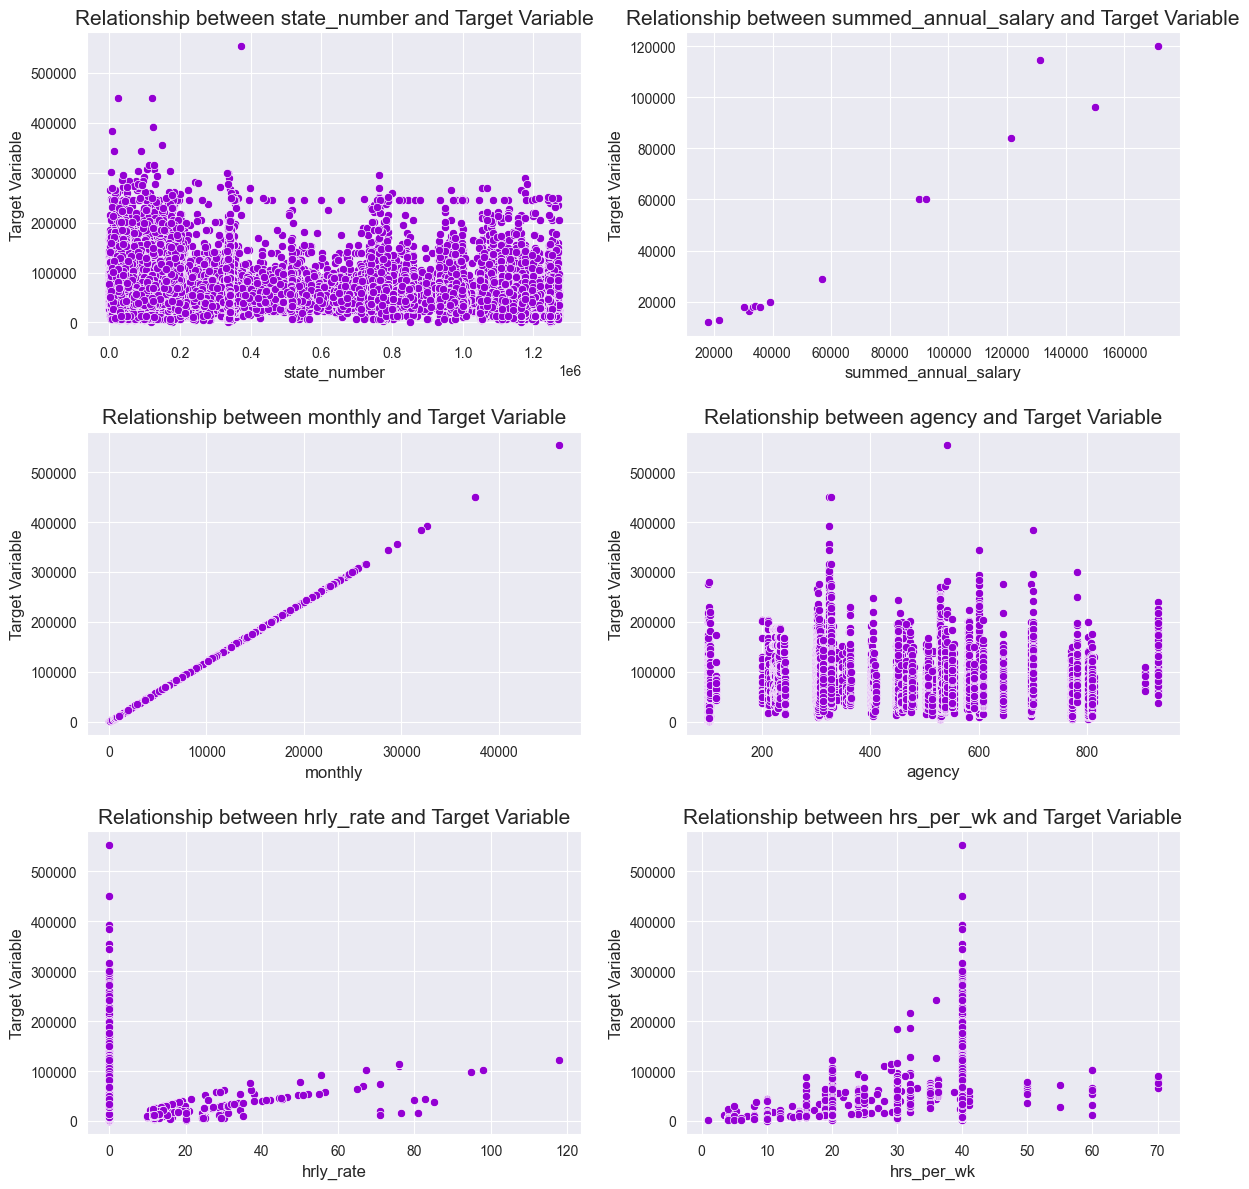

In [25]:
plt.figure(figsize=(12, 12))

sns.set_style('darkgrid')
plotnumber = 1

# Assuming 'continuous_data' contains your continuous input columns
for column in continuous_data:
    if plotnumber <= 6:
        ax = plt.subplot(3, 2, plotnumber)
        sns.scatterplot(x=continuous_data[column], y=data['annual'], color='darkviolet')
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Target Variable', fontsize=12)
        plt.title(f'Relationship between {column} and Target Variable', fontsize=15)
    plotnumber += 1

plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

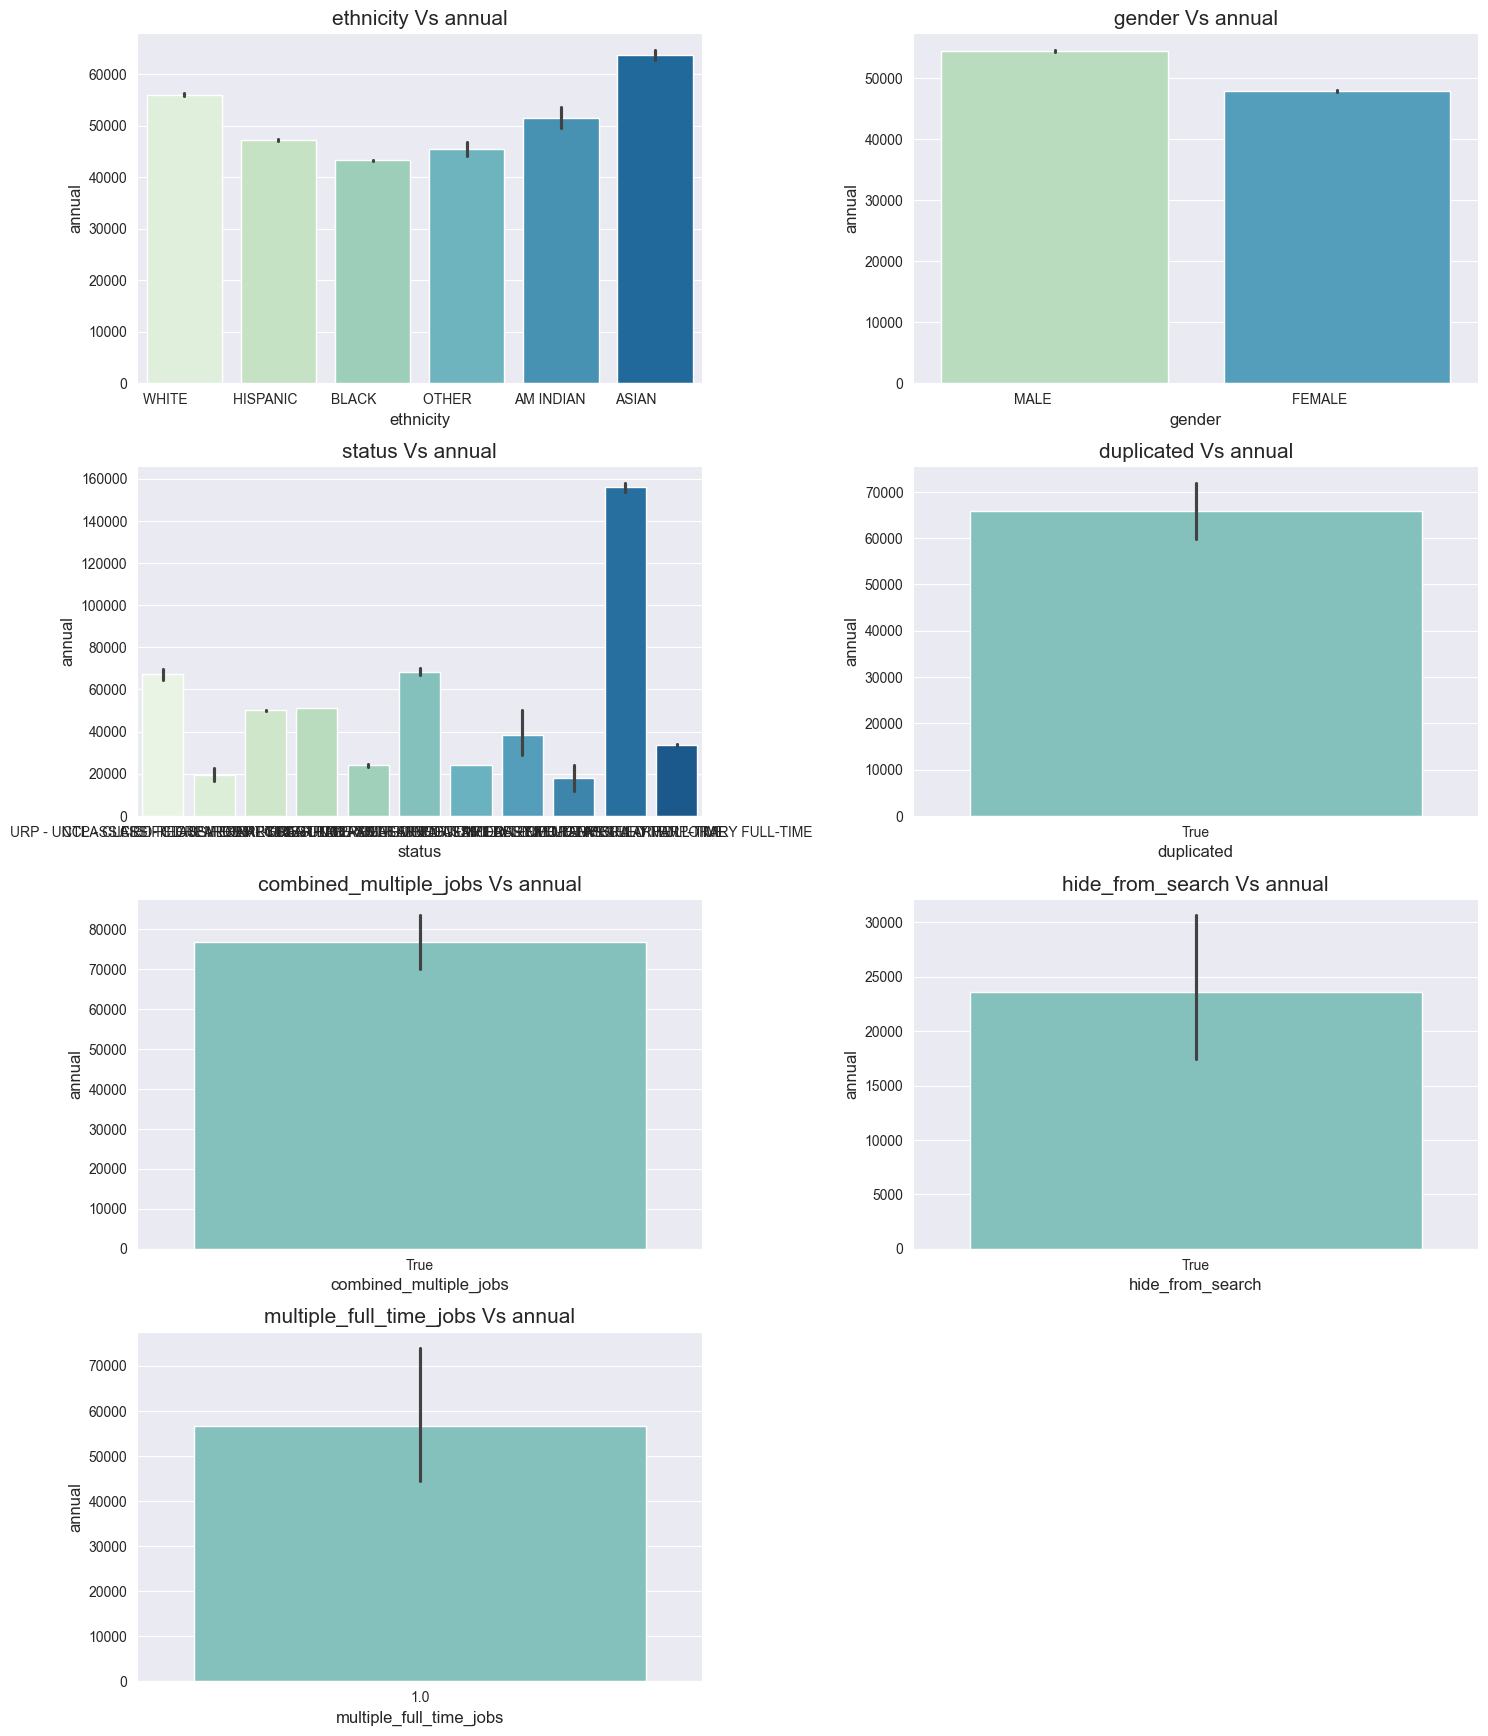

In [26]:
plt.figure(figsize= (15, 30), facecolor= 'white')
sns.set_style('darkgrid')
plotnumber=1

for column in categorial_data:
    if plotnumber <= 14:
        ax= plt.subplot(7,2, plotnumber)
        sns.barplot(x=column, y ='annual',data= data, palette= 'GnBu')
        plt.xlabel(column, fontsize= 12)
        plt.ylabel('annual', fontsize= 12)
        plt.title(f'{column} Vs annual', fontsize= 15)
    plotnumber += 1
plt.tight_layout()
plt.show()

MULTIVARIATE ANALYSIS


In [27]:
numerical_columns

['agency',
 'hrly_rate',
 'hrs_per_wk',
 'monthly',
 'annual',
 'state_number',
 'multiple_full_time_jobs',
 'summed_annual_salary']

In [28]:
continuous_data_for_pair_plot = data[['state_number','summed_annual_salary', 'monthly', 'agency', 'hrly_rate', 'hrs_per_wk']]

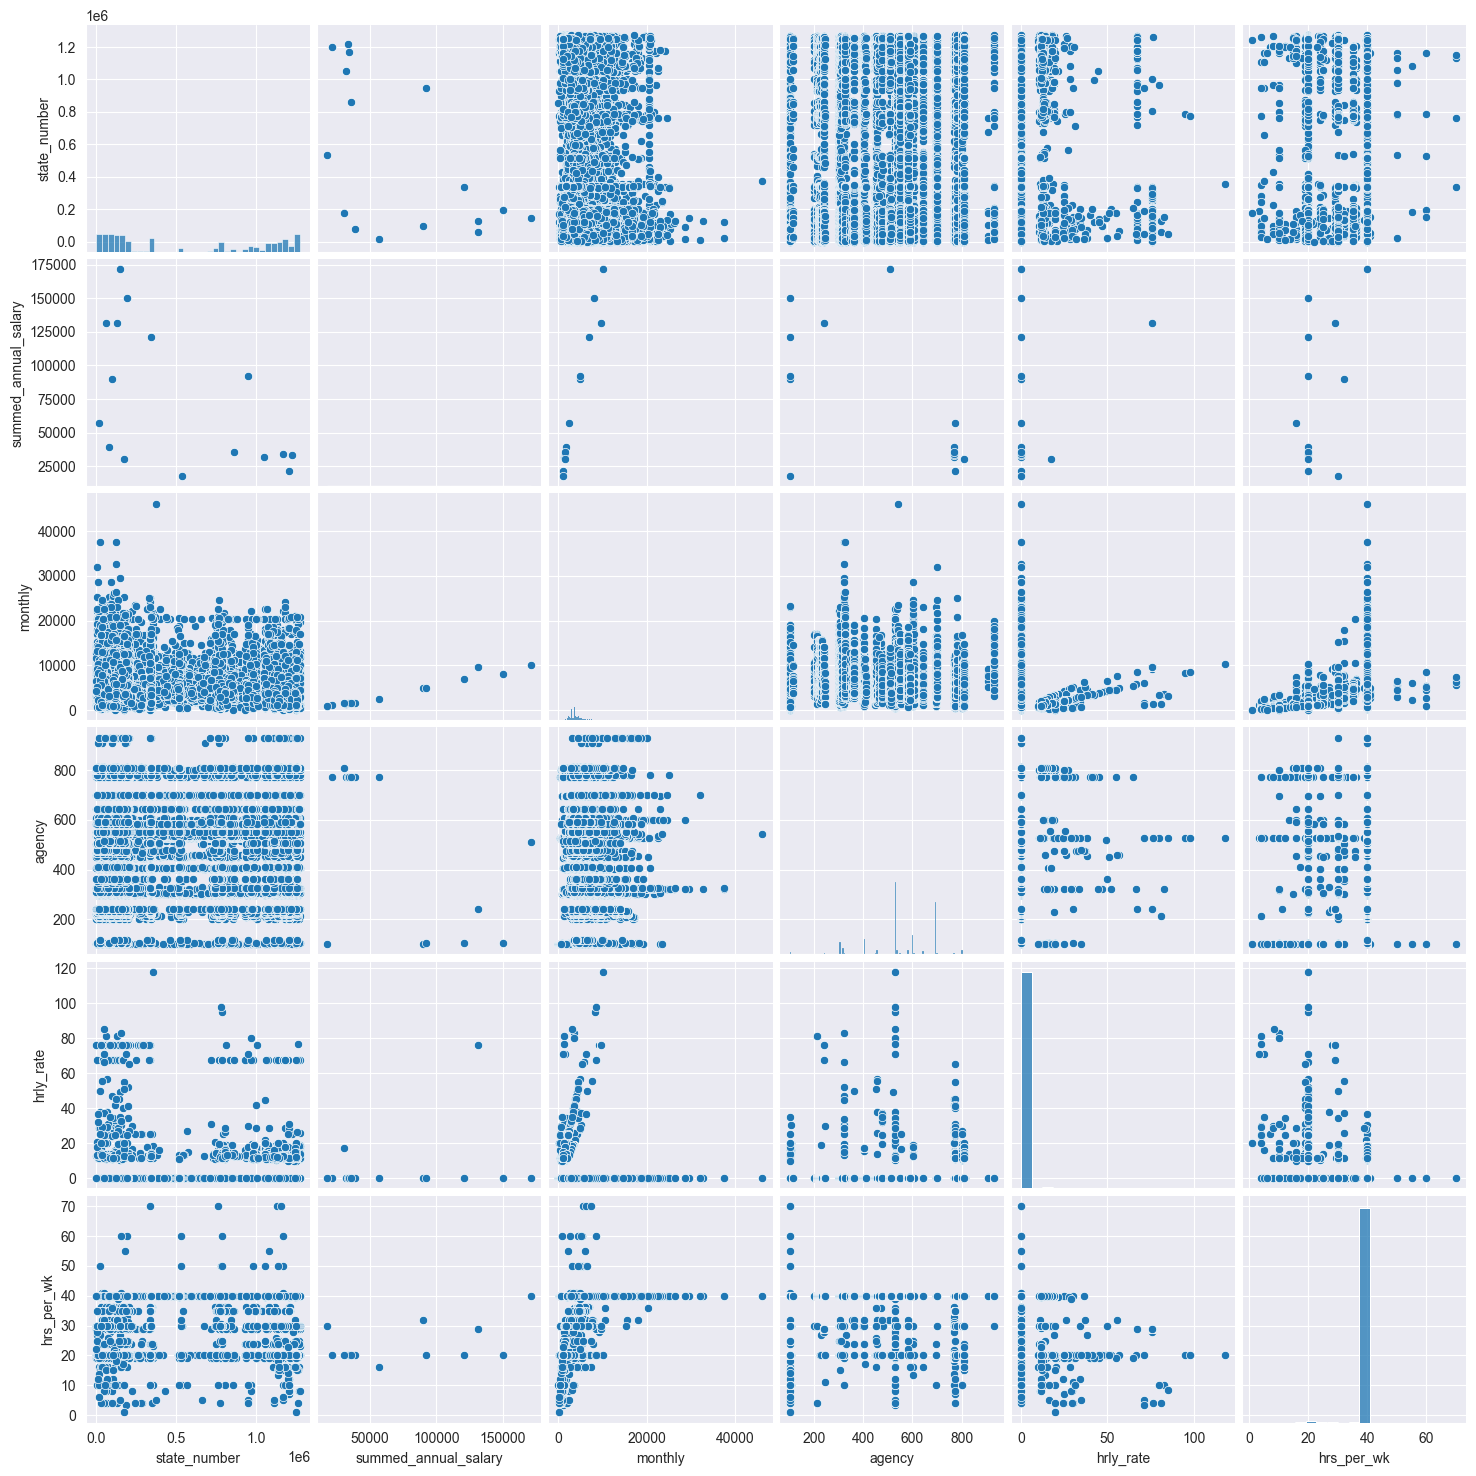

In [29]:
sns.pairplot(continuous_data_for_pair_plot)
plt.show()

DATA PREPROCESSING:


CHECKING NULL VALUES:


In [30]:
data.isnull().sum()

agency                          0
agency_name                     0
last_name                       0
first_name                      0
mi                              0
class_code                      0
class_title                     0
ethnicity                       0
gender                          0
status                          0
employ_date                     0
hrly_rate                       0
hrs_per_wk                      0
monthly                         0
annual                          0
state_number                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

In [31]:
# dropping the last five columns with more null values

data.drop(['duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs', 'summed_annual_salary', 'hide_from_search'], axis=1, inplace= True)
data.head(2)

,agency,agency_name,last_name,first_name,mi,class_code,class_title,ethnicity,gender,status,employ_date,hrly_rate,hrs_per_wk,monthly,annual,state_number
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717


HANDLING employ_date column:

In [32]:
# importing datetime to apply in the column
from datetime import datetime as dt
data['employ_date']= pd.to_datetime(data['employ_date'])
data[['employ_date']]

,employ_date
0,1988-02-18
1,2015-02-01
2,2020-02-01
3,2018-09-01
4,2020-06-29
...,...
149476,2017-10-30
149477,2015-07-13
149478,2012-10-15
149479,1989-09-22


In [33]:
# adding a column to show the year separately from the 'employ_date'column
data['year'] = data['employ_date'].dt.year
data.head(5)

,agency,agency_name,last_name,first_name,mi,class_code,class_title,ethnicity,gender,status,employ_date,hrly_rate,hrs_per_wk,monthly,annual,state_number,year
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1988-02-18,75.96150,29.0,9545.82,114549.84,127717,1988
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,2015-02-01,81.04454,4.0,1404.77,16857.24,127717,2015
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2020-02-01,75.96150,29.0,9545.82,114549.84,59115,2020
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,2018-09-01,81.04453,4.0,1404.77,16857.24,59115,2018
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2020-06-29,0.00000,40.0,3284.27,39411.24,165030,2020


In [34]:
# adding 'current_date' as separate column
now= dt.now()

data['current_date'] = dt.date(now)
data.head(5)

,agency,agency_name,last_name,first_name,mi,class_code,class_title,ethnicity,gender,status,employ_date,hrly_rate,hrs_per_wk,monthly,annual,state_number,year,current_date
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1988-02-18,75.96150,29.0,9545.82,114549.84,127717,1988,2024-03-12
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,2015-02-01,81.04454,4.0,1404.77,16857.24,127717,2015,2024-03-12
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2020-02-01,75.96150,29.0,9545.82,114549.84,59115,2020,2024-03-12
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,2018-09-01,81.04453,4.0,1404.77,16857.24,59115,2018,2024-03-12
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2020-06-29,0.00000,40.0,3284.27,39411.24,165030,2020,2024-03-12


In [35]:
# adding 'years_employed' as a column
# years_employed= employ_date - current_date
# the subtracted result is applied into the lamnda function to calculate years for each record.

data['current_date'] = pd.to_datetime(data['current_date'])
data['employ_date'] = pd.to_datetime(data['employ_date'])

data['years_employed'] = ((data['current_date']) - (data['employ_date'])).dt.days / 365
data[['years_employed']]

,years_employed
0,36.087671
1,9.115068
2,4.112329
3,5.531507
4,3.704110
...,...
149476,6.369863
149477,8.671233
149478,11.413699
149479,34.493151


In [36]:
# now max no of years and min no of years employed

print(f'Maximum no of years employed: {data.years_employed.max()}')
print(f'Minimum no of years employed: {data.years_employed.min()}')

Maximum no of years employed: 48.56164383561644
Minimum no of years employed: -49.53150684931507


In [37]:
# calculating negligible years (<0) and eliminating them

negatively_employed_years = data.loc[data['years_employed'] < 0]
negatively_employed_years

,agency,agency_name,last_name,first_name,mi,class_code,class_title,ethnicity,gender,status,employ_date,hrly_rate,hrs_per_wk,monthly,annual,state_number,year,current_date,years_employed
20904,405,DEPARTMENT OF PUBLIC SAFETY ...,HARALSON,JOE,W,9940,"SERGEANT, DPS ...",WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2071-10-06,0.0,40.0,7207.91,86494.92,171968,2071,2024-03-12,-47.600000
88771,601,TEXAS DEPARTMENT OF TRANSPORTATION ...,HALFORD,JULIA,F,0152,ADMINISTRATIVE ASST II ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2072-08-01,0.0,40.0,3388.44,40661.28,100209,2072,2024-03-12,-48.421918
92736,601,TEXAS DEPARTMENT OF TRANSPORTATION ...,OTAHAL,MARY,M,1572,PROGRAM SPECIALIST III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2073-09-10,0.0,40.0,5733.00,68796.00,180353,2073,2024-03-12,-49.531507
116978,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,JUDD,ARTHUR,G,4675,AGRICULTURE SPEC V ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2069-07-14,0.0,40.0,4033.74,48404.88,68427,2069,2024-03-12,-45.369863
141891,102,HOUSE OF REPRESENTATIVES ...,CRADDICK,TOM,R,7109,ELECTED OFFICIAL ...,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2069-01-14,0.0,40.0,600.00,7200.00,116511,2069,2024-03-12,-44.873973
142425,102,HOUSE OF REPRESENTATIVES ...,THOMPSON,SENFRONIA,,7109,ELECTED OFFICIAL ...,BLACK,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2073-01-09,0.0,40.0,600.00,7200.00,6963,2073,2024-03-12,-48.863014
148921,592,SOIL AND WATER CONSERVATION BOARD ...,BRANDENBERGER,DONALD,C,1576,PROGRAM SPECIALIST VII ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2068-12-01,0.0,40.0,7658.41,91900.92,96871,2068,2024-03-12,-44.753425


In [38]:
# total rows in the negatively employed dataset
print("There are totaly",len(negatively_employed_years), "number of employes has the negatively employed years")

There are totaly 7 number of employes has the negatively employed years


These negatively_employed_years are really not usefull for the prediction in any of the ways. so we can drop these rows from the dataset.

In [39]:
# dropping negatively_employed_years rows from the dataset

data.drop(negatively_employed_years.index, inplace= True)
data

,agency,agency_name,last_name,first_name,mi,class_code,class_title,ethnicity,gender,status,employ_date,hrly_rate,hrs_per_wk,monthly,annual,state_number,year,current_date,years_employed
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1988-02-18,75.96150,29.0,9545.82,114549.84,127717,1988,2024-03-12,36.087671
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,2015-02-01,81.04454,4.0,1404.77,16857.24,127717,2015,2024-03-12,9.115068
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2020-02-01,75.96150,29.0,9545.82,114549.84,59115,2020,2024-03-12,4.112329
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,2018-09-01,81.04453,4.0,1404.77,16857.24,59115,2018,2024-03-12,5.531507
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2020-06-29,0.00000,40.0,3284.27,39411.24,165030,2020,2024-03-12,3.704110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2017-10-30,0.00000,40.0,2899.00,34788.00,770781,2017,2024-03-12,6.369863
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2015-07-13,0.00000,40.0,5500.00,66000.00,847431,2015,2024-03-12,8.671233
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,2012-10-15,12.93000,20.0,1120.60,13447.20,34266,2012,2024-03-12,11.413699
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,1989-09-22,0.00000,40.0,5744.16,68929.92,123490,1989,2024-03-12,34.493151


In [40]:
# dropping the other newly added columns related to employment date and keeping only the "years_employed" (years of employment) column

data.drop(['employ_date', 'year', 'current_date'], axis= 1, inplace= True)
data

,agency,agency_name,last_name,first_name,mi,class_code,class_title,ethnicity,gender,status,hrly_rate,hrs_per_wk,monthly,annual,state_number,years_employed
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,114549.84,127717,36.087671
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04454,4.0,1404.77,16857.24,127717,9.115068
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,114549.84,59115,4.112329
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04453,4.0,1404.77,16857.24,59115,5.531507
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,3284.27,39411.24,165030,3.704110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,2899.00,34788.00,770781,6.369863
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,5500.00,66000.00,847431,8.671233
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,12.93000,20.0,1120.60,13447.20,34266,11.413699
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,5744.16,68929.92,123490,34.493151


HANDLING OUTLIERS:


In [41]:
numerical_columns

['agency',
 'hrly_rate',
 'hrs_per_wk',
 'monthly',
 'annual',
 'state_number',
 'multiple_full_time_jobs',
 'summed_annual_salary']

In [42]:
# oultliers for numerical_columns features

numerical_columns_data_outliers = data[['state_number','monthly','agency','hrly_rate', 'hrs_per_wk']]
numerical_columns_data_outliers

,state_number,monthly,agency,hrly_rate,hrs_per_wk
0,127717,9545.82,241,75.96150,29.0
1,127717,1404.77,212,81.04454,4.0
2,59115,9545.82,241,75.96150,29.0
3,59115,1404.77,212,81.04453,4.0
4,165030,3284.27,696,0.00000,40.0
...,...,...,...,...,...
149476,770781,2899.00,809,0.00000,40.0
149477,847431,5500.00,809,0.00000,40.0
149478,34266,1120.60,809,12.93000,20.0
149479,123490,5744.16,809,0.00000,40.0


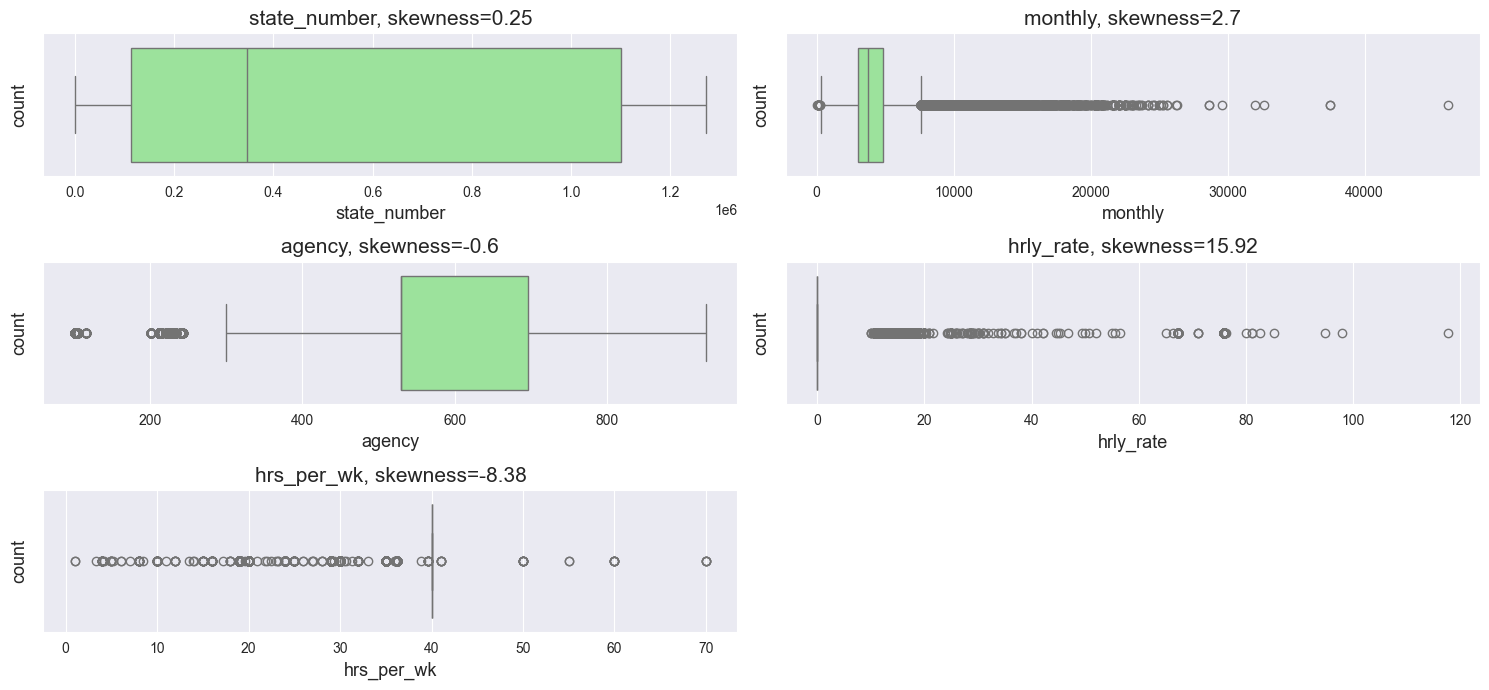

In [43]:
# visualizing the numerical features through boxplot

plt.figure(figsize= (15, 7))
sns.set_style('darkgrid')
plotnumber=1

for column in numerical_columns_data_outliers:
    if plotnumber <= 6:
        ax= plt.subplot(3, 2, plotnumber)
        sns.boxplot(data=data, x=column, color='lightgreen', orient='h')
        ax.set_title(f'{column}, skewness={round(data[column].skew(),2)}', fontsize=15)
        plt.xlabel(column, fontsize=13)
        plt.ylabel('count', fontsize=13)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [44]:
Q1 = numerical_columns_data_outliers.quantile(0.25)
Q3 = numerical_columns_data_outliers.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numerical_columns_data_outliers < (Q1 - 1.5 * IQR)) | (numerical_columns_data_outliers > (Q3 + 1.5 * IQR)))

# sum of outliers
number_of_outliers = outliers.sum()

# percentage of outliers
outliers_percentage = (number_of_outliers / len(numerical_columns_data_outliers)) * 100

print(f'SUM OF OUTLIERS: \n{number_of_outliers}')
print(f'\nPERCENTAGE OF OUTLIERS: \n{outliers_percentage}')

number_of_outliers.to_frame().T

SUM OF OUTLIERS: 
state_number       0
monthly         9030
agency          3694
hrly_rate       1748
hrs_per_wk      2609
dtype: int64

PERCENTAGE OF OUTLIERS: 
state_number    0.000000
monthly         6.041184
agency          2.471333
hrly_rate       1.169434
hrs_per_wk      1.745454
dtype: float64


,state_number,monthly,agency,hrly_rate,hrs_per_wk
0,0,9030,3694,1748,2609


In [45]:
# Hadling the outliers for hrly_rate column

q1 = data['hrly_rate'].quantile(0.25)
q3 = data['hrly_rate'].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

print('Upper bound', '\033[1m', upper_bound, 'and lower bound', '\033[1m',lower_bound)

Upper bound  0.0 and lower bound  0.0


In [46]:
data[['hrly_rate']].value_counts(normalize= True)

hrly_rate
0.00000      0.988306
75.96150     0.002161
18.00000     0.000696
19.00000     0.000636
67.30765     0.000495
               ...   
12.01000     0.000007
12.16000     0.000007
12.20002     0.000007
12.20459     0.000007
117.78848    0.000007
Name: proportion, Length: 206, dtype: float64

- Insights:-  Almost 98% of values are 0 hence outliers handling is irrelevant here.

In [47]:
# Hadling the outliers for hrs_per_wk column

q1 = data['hrs_per_wk'].quantile(0.25)
q3 = data['hrs_per_wk'].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

print('Upper bound', '\033[1m', upper_bound, 'and lower bound', '\033[1m',lower_bound)

Upper bound  40.0 and lower bound  40.0


In [48]:
# Hadling the outliers for monthly column

q1 = data['monthly'].quantile(0.25)
q3 = data['monthly'].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

print('Upper bound', '\033[1m', upper_bound, 'and lower bound', '\033[1m',lower_bound)

Upper bound  7634.708750000001 and lower bound  250.91874999999982


SCALING

In [49]:
data.head(5)

,agency,agency_name,last_name,first_name,mi,class_code,class_title,ethnicity,gender,status,hrly_rate,hrs_per_wk,monthly,annual,state_number,years_employed
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,114549.84,127717,36.087671
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04454,4.0,1404.77,16857.24,127717,9.115068
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,114549.84,59115,4.112329
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04453,4.0,1404.77,16857.24,59115,5.531507
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,3284.27,39411.24,165030,3.704110


In [50]:
# from the continuous column or numerical column the summed_annual_salary is removed, so the updated the udpated continuous column data

updated_continuous_columns = data[['state_number','monthly','agency','hrly_rate','hrs_per_wk']]
updated_continuous_columns.head(5)

,state_number,monthly,agency,hrly_rate,hrs_per_wk
0,127717,9545.82,241,75.96150,29.0
1,127717,1404.77,212,81.04454,4.0
2,59115,9545.82,241,75.96150,29.0
3,59115,1404.77,212,81.04453,4.0
4,165030,3284.27,696,0.00000,40.0


In [51]:
from sklearn.discriminant_analysis import StandardScaler

scalar = StandardScaler()
scaled_data = scalar.fit_transform(updated_continuous_columns)

In [52]:
data[['state_number','monthly','agency','hrly_rate','hrs_per_wk']] = scalar.fit_transform(updated_continuous_columns[['state_number','monthly','agency','hrly_rate','hrs_per_wk']])

In [53]:
# check data is perfectly scaled or not
data

,agency,agency_name,last_name,first_name,mi,class_code,class_title,ethnicity,gender,status,hrly_rate,hrs_per_wk,monthly,annual,state_number,years_employed
0,-2.191597,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,17.954116,-4.610742,2.541541,114549.84,-0.914080,36.087671
1,-2.400155,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,19.161039,-15.368517,-1.347978,16857.24,-0.914080,9.115068
2,-2.191597,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,17.954116,-4.610742,2.541541,114549.84,-1.057413,4.112329
3,-2.400155,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,19.161037,-15.368517,-1.347978,16857.24,-1.057413,5.531507
4,1.080612,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,-0.082274,0.122680,-0.450016,39411.24,-0.836121,3.704110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,1.893271,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,-0.082274,0.122680,-0.634085,34788.00,0.429498,6.369863
149477,1.893271,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,-0.082274,0.122680,0.608585,66000.00,0.589646,8.671233
149478,1.893271,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,2.987841,-8.483541,-1.483744,13447.20,-1.109331,11.413699
149479,1.893271,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,-0.082274,0.122680,0.725236,68929.92,-0.922912,34.493151


ENCODING:


In [54]:
# dropping unnecessary categorical columns before encoding

data.drop(['last_name', 'first_name', 'mi', 'class_code'], axis= 1, inplace = True)
data.head(5)

,agency,agency_name,class_title,ethnicity,gender,status,hrly_rate,hrs_per_wk,monthly,annual,state_number,years_employed
0,-2.191597,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,17.954116,-4.610742,2.541541,114549.84,-0.914080,36.087671
1,-2.400155,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,19.161039,-15.368517,-1.347978,16857.24,-0.914080,9.115068
2,-2.191597,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,17.954116,-4.610742,2.541541,114549.84,-1.057413,4.112329
3,-2.400155,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,19.161037,-15.368517,-1.347978,16857.24,-1.057413,5.531507
4,1.080612,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,-0.082274,0.122680,-0.450016,39411.24,-0.836121,3.704110


In [55]:
# one-hot encoding

encoded_data = data.copy()
encoded_data = pd.get_dummies(encoded_data,drop_first= False)
encoded_data.head(5)

,agency,hrly_rate,hrs_per_wk,monthly,annual,state_number,years_employed,agency_name_ALCOHOLIC BEVERAGE COMMISSION,agency_name_BOARD OF ARCHITECTURAL EXAMINERS,agency_name_BOARD OF CHIROPRACTIC EXAMINERS,...,status_CRP - CLASSIFIED REGULAR PART-TIME,status_CTF - CLASSIFIED TEMPORARY FULL-TIME,status_CTP - CLASSIFIED TEMPORARY FULL-TIME,status_CTP - CLASSIFIED TEMPORARY PART-TIME,status_ERF - EXEMPT REGULAR FULL-TIME,status_ERP - EXEMPT REGULAR PART-TIME,status_URF - UNCLASSIFIED REGULAR FULL-TIME,status_URP - UNCLASSIFIED REGULAR PART-TIME,status_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,status_UTP - UNCLASSIFIED TEMPORARY PART-TIME
0,-2.191597,17.954116,-4.610742,2.541541,114549.84,-0.914080,36.087671,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,-2.400155,19.161039,-15.368517,-1.347978,16857.24,-0.914080,9.115068,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,-2.191597,17.954116,-4.610742,2.541541,114549.84,-1.057413,4.112329,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,-2.400155,19.161037,-15.368517,-1.347978,16857.24,-1.057413,5.531507,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,1.080612,-0.082274,0.122680,-0.450016,39411.24,-0.836121,3.704110,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
# check teh shape after encoding, checking this since we have used the one-hot encode for encoding process
encoded_data.shape

(149474, 1561)

In [57]:
# checking the data types for the encoded dataset

encoded_data.dtypes

agency                                             float64
hrly_rate                                          float64
hrs_per_wk                                         float64
monthly                                            float64
annual                                             float64
                                                    ...   
status_ERP - EXEMPT REGULAR PART-TIME                 bool
status_URF - UNCLASSIFIED REGULAR FULL-TIME           bool
status_URP - UNCLASSIFIED REGULAR PART-TIME           bool
status_UTF - UNCLASSIFIED TEMPORARY FULL-TIME         bool
status_UTP - UNCLASSIFIED TEMPORARY PART-TIME         bool
Length: 1561, dtype: object

FEATURE ENGINEERING:

In [58]:
numerical_columns_for_correlation = data[['agency', 'hrly_rate', 'hrs_per_wk', 'monthly', 'annual', 'state_number', 'years_employed']]
numerical_columns_for_correlation

,agency,hrly_rate,hrs_per_wk,monthly,annual,state_number,years_employed
0,-2.191597,17.954116,-4.610742,2.541541,114549.84,-0.914080,36.087671
1,-2.400155,19.161039,-15.368517,-1.347978,16857.24,-0.914080,9.115068
2,-2.191597,17.954116,-4.610742,2.541541,114549.84,-1.057413,4.112329
3,-2.400155,19.161037,-15.368517,-1.347978,16857.24,-1.057413,5.531507
4,1.080612,-0.082274,0.122680,-0.450016,39411.24,-0.836121,3.704110
...,...,...,...,...,...,...,...
149476,1.893271,-0.082274,0.122680,-0.634085,34788.00,0.429498,6.369863
149477,1.893271,-0.082274,0.122680,0.608585,66000.00,0.589646,8.671233
149478,1.893271,2.987841,-8.483541,-1.483744,13447.20,-1.109331,11.413699
149479,1.893271,-0.082274,0.122680,0.725236,68929.92,-0.922912,34.493151


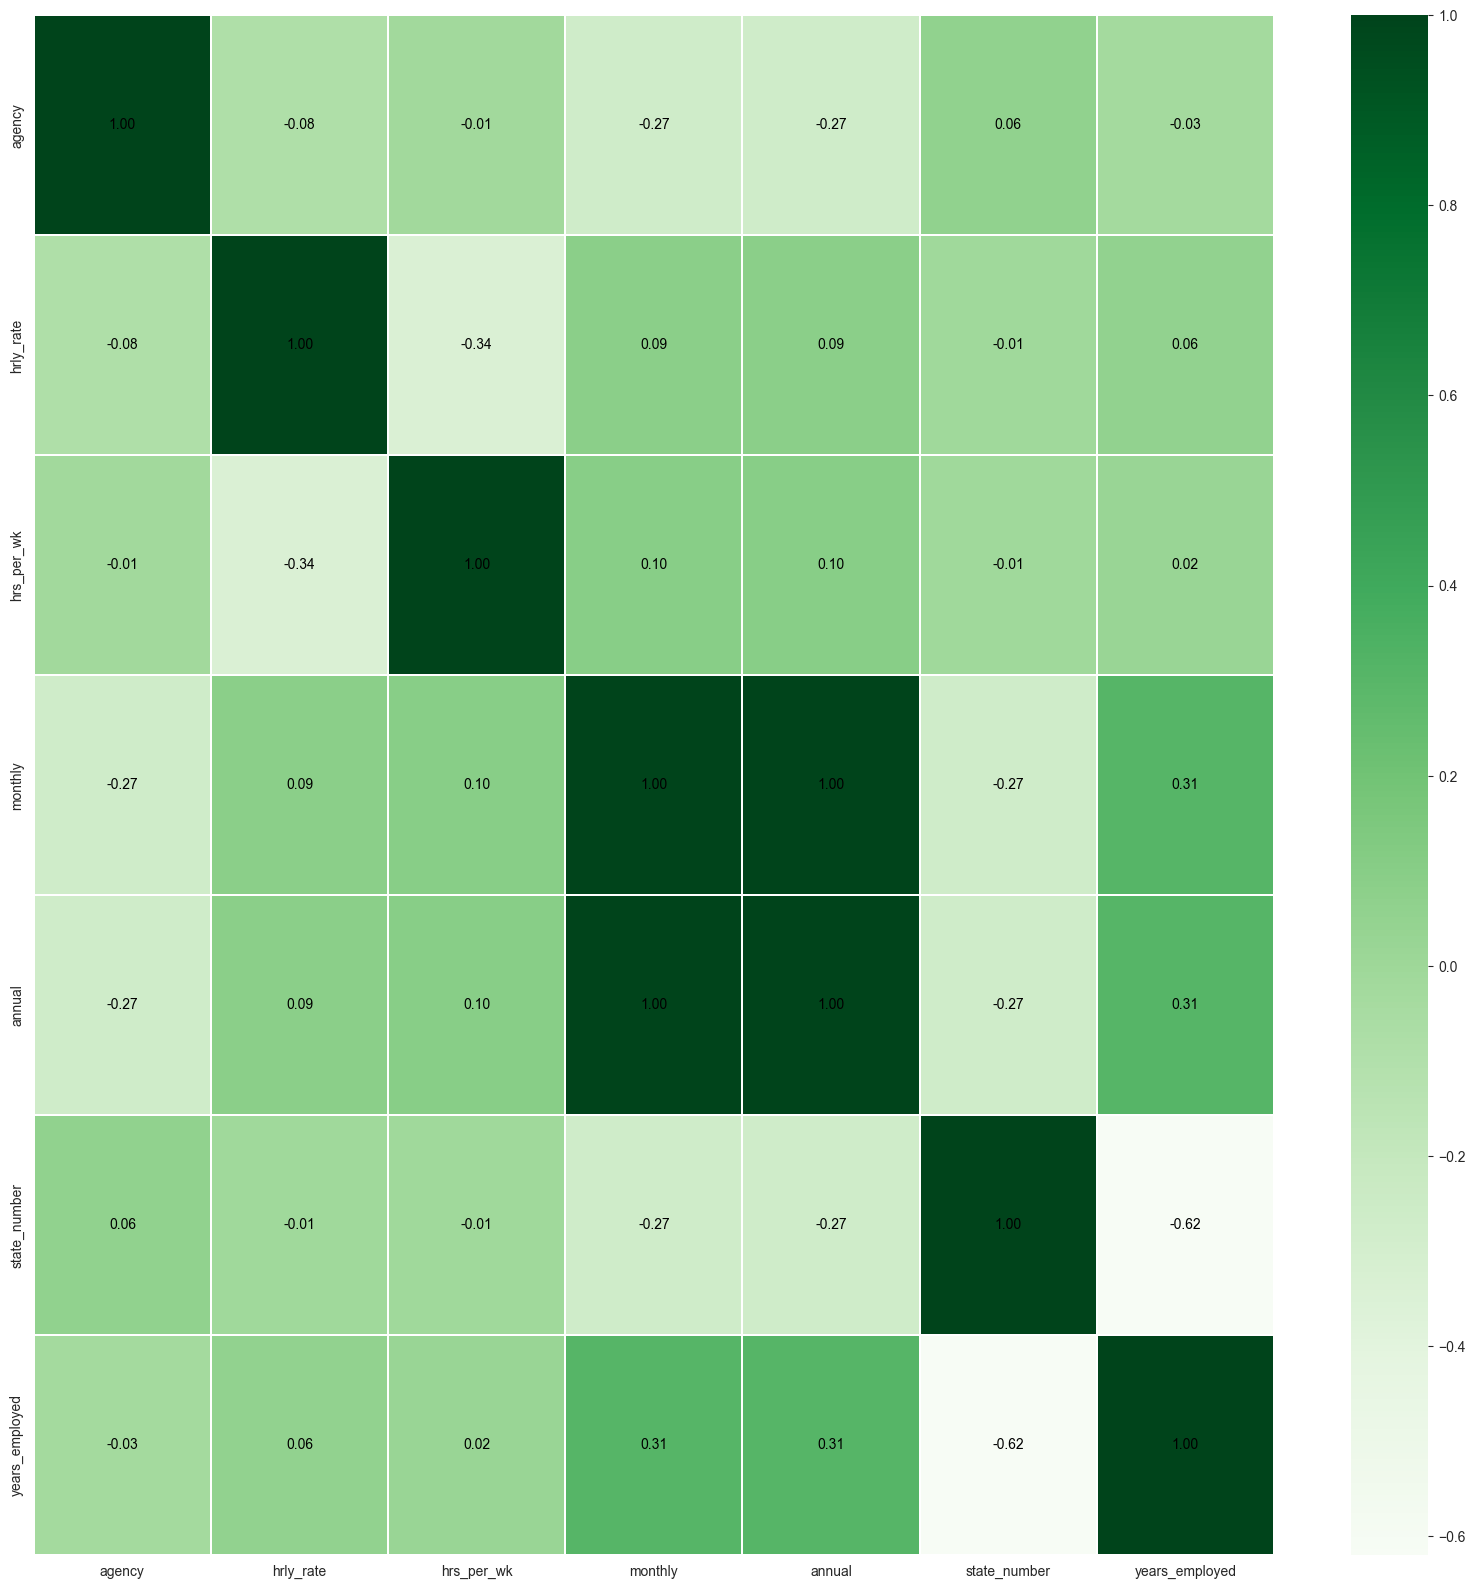

In [59]:
# check for correlation
plt.figure(figsize=(20,20))
sns.heatmap(numerical_columns_for_correlation.corr(), cmap='Greens', annot=True, annot_kws={'color': 'black'}, fmt= '.2f', linewidths= 0.2)
plt.show()

In [60]:
# agency, hrly_rate, hrs_per_week are dropped
encoded_data.drop(['agency', 'hrs_per_wk', 'hrly_rate'], axis=1, inplace= True)
encoded_data.head(2)

,monthly,annual,state_number,years_employed,agency_name_ALCOHOLIC BEVERAGE COMMISSION,agency_name_BOARD OF ARCHITECTURAL EXAMINERS,agency_name_BOARD OF CHIROPRACTIC EXAMINERS,agency_name_BOARD OF DENTAL EXAMINERS,agency_name_BOARD OF EXAMINERS OF PSYCHOLOGISTS,agency_name_BOARD OF NURSE EXAMINERS,...,status_CRP - CLASSIFIED REGULAR PART-TIME,status_CTF - CLASSIFIED TEMPORARY FULL-TIME,status_CTP - CLASSIFIED TEMPORARY FULL-TIME,status_CTP - CLASSIFIED TEMPORARY PART-TIME,status_ERF - EXEMPT REGULAR FULL-TIME,status_ERP - EXEMPT REGULAR PART-TIME,status_URF - UNCLASSIFIED REGULAR FULL-TIME,status_URP - UNCLASSIFIED REGULAR PART-TIME,status_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,status_UTP - UNCLASSIFIED TEMPORARY PART-TIME
0,2.541541,114549.84,-0.91408,36.087671,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,-1.347978,16857.24,-0.91408,9.115068,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


MODEL BUILDING:

In [61]:
# splitting the data
X = encoded_data.drop('annual', axis= 1)
y = encoded_data[['annual']]

In [62]:
# Checking the shape of X and y

print(f'X: {X.shape}\ny: {y.shape}') 

X: (149474, 1557)
y: (149474, 1)


In [63]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
print("X trained data shape", x_train.shape)
print("X test data shape", x_test.shape)
print("Y train data shape", y_train.shape)
print("Y test data split", y_test.shape)

X trained data shape (119579, 1557)
X test data shape (29895, 1557)
Y train data shape (119579, 1)
Y test data split (29895, 1)


Model Implementation


LINEAR REGRESSION


In [65]:
from sklearn.linear_model import LinearRegression

# Creating a Linear Regression model
model = LinearRegression()

# Training the model
model.fit(x_train, y_train)

LinearRegression()

In [66]:
# prediction
y_pred = model.predict(x_test)

In [67]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluation

r= r2_score(y_test, y_pred)
print(f'Model r2_score: {r * 100}%')

Model r2_score: 99.99999999998545%


In [68]:
mean_square_error_score = mean_squared_error(y_test, y_pred)
mean_square_error_score

9.159759329374535e-05

In [69]:
mean_absolute_error_score = mean_absolute_error(y_test, y_pred)
mean_absolute_error_score

0.00041482630337344066

In [70]:
# adjusted r2 score
# 1-(1-r2score)*(no. of rows in x_test - 1)/(no.of.rows in x_test -  no of columns in x_test - 1)

In [71]:
x_test.shape

(29895, 1557)

In [72]:
adjusted_r2_score = 1 - (1 - 0.9999999999977999) * (29895 - 1) / (1000 - 1557 - 1)
adjusted_r2_score

1.0000000001178686

In [73]:

# Checking for overfitting and underfitting

training_accuracy_for_linear_model = model.score(x_train, y_train)
testing_accuracy_for_linear_model = model.score(x_test, y_test)

print(f'Training set score: {training_accuracy_for_linear_model}')
print(f'Testing set score: {testing_accuracy_for_linear_model}')

Training set score: 1.0
Testing set score: 0.9999999999998544


In [74]:
# Cross-validation
from sklearn.model_selection import cross_val_score, cross_val_predict

# cross validation accuracy
scores = cross_val_score(model, X, y, cv = 5, scoring= 'r2')
print(f'Cross validation r2_scores: {scores}')

Cross validation r2_scores: [1.         0.99969966 0.99996825 0.99999645 0.99950249]


In [75]:
linear_regression_score = pd.DataFrame({'CV mean': scores.mean(), 'Std': scores.std()}, index= ['Cross validation accuracy'])
linear_regression_score

,CV mean,Std
Cross validation accuracy,0.999833,0.0002


In [76]:
# Performance metrics

'''Defining a function to calculate all the required performance metrics
for the given model'''

def metrics_calculator(y_test, y_pred, model_name):
    result= pd.DataFrame(data = [r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)], index=['r2 score','mean_squared_error','mean_absolute_error'], columns= [model_name])
    return result

In [77]:
base_linear_regression_result = metrics_calculator(y_test, y_pred, 'Base Linear Regression')
base_linear_regression_result

,Base Linear Regression
r2 score,1.000000
mean_squared_error,0.000092
mean_absolute_error,0.000415


Tunning for Linear Regression Model

Decission Tree


In [78]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [79]:
y_pred_dt = model_dt.predict(x_test)

In [80]:
# R2Score for the decission Tree Regressor

r2score_dt = r2_score(y_test, y_pred_dt)
r2score_dt

0.9994494269803943

In [81]:
x_test.shape

(29895, 1557)

In [82]:
# adjusted R2Score for decission Tree regressor

adjusted_r2_score_dt = 1 - (1 - r2score_dt) * (29895 - 1) / (29895 - 1557 - 1)
adjusted_r2_score_dt

0.9994191752885594

Perform Hyperparameter tunning for Decission Tree

In [83]:
from sklearn.model_selection import RepeatedKFold

In [84]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

# Defining evelauation to get best params
max_depth = range(2, 10)
criterion = ['mse', 'friedman_mse', 'mae']
min_samples_split = [2,3,4]
min_samples_leaf = [1,2,3]

param_dist = {'max_depth': max_depth, 'criterion': criterion, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

In [85]:
# Implementing RandomizedSearch
from sklearn.model_selection import RandomizedSearchCV

search = RandomizedSearchCV(model_dt, param_dist, scoring='r2', n_jobs=-1, cv=cv)

randomized_search_cv = search.fit(x_train, y_train)
model_cv_dt_cv = randomized_search_cv.best_estimator_

print("Best Score: ", model_cv_dt_cv)
print("Best Hyperparameter: ", randomized_search_cv.best_params_)

Best Score:  DecisionTreeRegressor(criterion='friedman_mse', max_depth=8, min_samples_leaf=2,
                      random_state=42)
Best Hyperparameter:  {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 8, 'criterion': 'friedman_mse'}


In [86]:
model_dt_after_tunning = DecisionTreeRegressor(criterion=randomized_search_cv.best_params_['criterion'], max_depth=randomized_search_cv.best_params_['max_depth'], min_samples_leaf=randomized_search_cv.best_params_['min_samples_leaf'], random_state=42, min_samples_split=randomized_search_cv.best_params_['min_samples_split'])
model_dt_after_tunning.fit(x_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=8, min_samples_leaf=2,
                      random_state=42)

In [87]:
y_prediction_dt_after_tunning = model_dt_after_tunning.predict(x_test)

In [88]:
# r2Score after tunning in decission tree

r2score_dt_after_tunning = r2_score(y_test, y_prediction_dt_after_tunning)
r2score_dt_after_tunning

0.9994075330620414

In [89]:
# adjusted R2Score for decission Tree regressor

adjusted_r2_score_dt = 1 - (1 - r2score_dt_after_tunning) * (29895 - 1) / (29895 - 1557 - 1)
adjusted_r2_score_dt

0.9993749794740681

In [90]:
tuned_dt_result = metrics_calculator(y_test, y_prediction_dt_after_tunning, 'Tuned Decision tree regressor')
tuned_dt_result

,Tuned Decision tree regressor
r2 score,0.999408
mean_squared_error,372947.893518
mean_absolute_error,100.114638


RANDOM FOREST


In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
model_rf = RandomForestRegressor(n_estimators = 5, random_state = 42)
model_rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=5, random_state=42)

In [93]:
y_predict_rf = model_rf.predict(x_test)

In [94]:
r2score_rf = r2_score(y_test, y_predict_rf)
r2score_rf

0.99941569167318

In [95]:
adjusted_r2_score_for_rf = 1 - (1 - r2score_rf) * (29895 - 1) / (29895 - 1557 - 1)
adjusted_r2_score_for_rf

0.9993835863668717

In [96]:
# Checking for overfitting and underfitting

training_score= model_rf.score(x_train, y_train)
testing_score= model_rf.score(x_test, y_test)
print(f'Training set score: {training_score}')
print(f'Testing set score: {testing_score}')

Training set score: 0.9998687448499634
Testing set score: 0.99941569167318


The training score is 0.9998 (99.98%) which is slightly higher than the testing score (99.94%).

In [97]:
# cross validation accuracy
scores_rf = cross_val_score(model_rf, X, y, cv = 5, scoring= 'r2')
print(f'Cross validation r2_scores: {scores_rf}')

Cross validation r2_scores: [0.99991846 0.99999831 0.99919223 0.99999867 0.9999237 ]


In [98]:
rf_score = pd.DataFrame({'CV mean': scores_rf.mean(), 'Std': scores_rf.std()}, index= ['Cross validation accuracy'])
rf_score.T

,Cross validation accuracy
CV mean,0.999806
Std,0.000309


In [99]:
# Performance metrics
base_rf_result = metrics_calculator(y_test, y_predict_rf, 'Base Random Forest Regressor')
base_rf_result

,Base Random Forest Regressor
r2 score,0.999416
mean_squared_error,367812.186117
mean_absolute_error,9.829914


Tunning for Random Forest Model

In [100]:
model_rf_after_tunning = RandomForestRegressor(criterion='friedman_mse', max_depth=8, min_samples_leaf=2, random_state=42, n_estimators=3, min_samples_split=4)
model_rf_after_tunning.fit(x_train, y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=8, min_samples_leaf=2,
                      min_samples_split=4, n_estimators=3, random_state=42)

In [101]:
y_predict_rf_after_tunning = model_rf_after_tunning.predict(x_test)

In [102]:
r2score_rf_after_tunnong = r2_score(y_test, y_predict_rf_after_tunning)
r2score_rf_after_tunnong

0.9992799961407514

In [103]:
adjusted_r2_score_for_rf_after_tunning = 1 - (1 - 0.9992799961407514) * (29895 - 1) / (29895 - 1557 - 1)
adjusted_r2_score_for_rf_after_tunning

0.9992404349307132

In [104]:
# Checking for overfitting and underfitting

training_score_rf_model = model_rf_after_tunning.score(x_train, y_train)
testing_score_rf_model = model_rf_after_tunning.score(x_test, y_test)

print(f'Training set score after Tunning: {training_score_rf_model}')
print(f'Testing set score after tunning: {testing_score_rf_model}')

Training set score after Tunning: 0.9995116032920662
Testing set score after tunning: 0.9992799961407514


The training score after tunning for Random forest method is 0.9995 (99.95%) which is slightly higher than the testing score (99.92%).

k-Nearest Neighbour Model Implementation

In [105]:
from sklearn.neighbors import KNeighborsRegressor

k = 3
knn = KNeighborsRegressor(n_neighbors=k)

# Train the model
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [106]:
# Predictions
y_pred_knn = knn.predict(x_test)

In [107]:
# Evaluation

# Finding the mean squared error for knn
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error:", mse_knn)

Mean Squared Error: 13639463.042716978


In [108]:
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print("Mean absolute Error:", mae_knn)

Mean absolute Error: 1832.9755410603784


In [109]:
knn_r2_score = r2_score(y_test, y_pred_knn)
print("R2 score for knn", knn_r2_score)

R2 score for knn 0.9783322789999405


In [110]:
adjusted_r2_score_for_knn = 1 - (1 - knn_r2_score) * (29895 - 1) / (29895 - 1557 - 1)
adjusted_r2_score_for_knn

0.9771417280736924

In [111]:
training_score_for_knn = knn.score(x_train, y_train)
testing_score_for_knn = knn.score(x_test, y_test)
  
print(f'Training set score after tunning: {training_score_for_knn}')  
print(f'Testing set score after tunni ng: {testing_score_for_knn}')

Training set score after tunning: 0.9896008386680579
Testing set score after tunning: 0.9783322789999405


In [112]:
knn_result = metrics_calculator(y_test, y_pred_knn, 'Metrices Knn regressor')
knn_result

,Metrices Knn regressor
r2 score,9.783323e-01
mean_squared_error,1.363946e+07
mean_absolute_error,1.832976e+03


Hyper parameter tunning for the Knn

In [113]:
param_grid_for_knn = {
    'n_neighbors': 5,
    'weights': 'uniform',
    'metric': 'euclidean',
    'algorithm':'auto'
}

In [114]:
model_knn_after_tunning = KNeighborsRegressor(n_neighbors=param_grid_for_knn['n_neighbors'], weights=param_grid_for_knn['weights'], metric=param_grid_for_knn['metric'], algorithm=param_grid_for_knn['algorithm'])
model_knn_after_tunning.fit(x_train, y_train)

KNeighborsRegressor(metric='euclidean')

In [115]:
y_predict_knn_after_tunning = model_knn_after_tunning.predict(x_test)

In [116]:
r2score_knn_after_tunning = r2_score(y_test, y_predict_knn_after_tunning)
r2score_knn_after_tunning

0.9790803909604192

In [117]:
adjusted_r2_score_for_knn_after_tunning = 1 - (1 - r2score_knn_after_tunning) * (29895 - 1) / (29895 - 1557 - 1)
adjusted_r2_score_for_knn_after_tunning

0.9779309456671762

In [118]:
knn_result_after_tunning = metrics_calculator(y_test, y_predict_knn_after_tunning, 'Metrices after tunned Knn regressor')
knn_result_after_tunning

,Metrices after tunned Knn regressor
r2 score,9.790804e-01
mean_squared_error,1.316854e+07
mean_absolute_error,1.830912e+03


SVM Model implementation

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline

In [121]:
# Create a pipeline with feature scaling and SVR
pipeline = make_pipeline(StandardScaler(), LinearSVR())

# Fit the pipeline to the training data
pipeline.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR())])

In [122]:
# Predict on the test data
y_pred_for_linear_svr = pipeline.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_for_linear_svr)
print("Mean Squared Error:", mse)

Mean Squared Error: 7159682.846387158


In [123]:
svr_r2_score = r2_score(y_test, y_pred_for_linear_svr)
print("R2 score for SVR", knn_r2_score)

R2 score for SVR 0.9783322789999405


In [124]:
adjusted_r2_score_for_svr = 1 - (1 - svr_r2_score) * (29895 - 1) / (29895 - 1557 - 1)
adjusted_r2_score_for_svr

0.9880011422079973

In [126]:
training_score_for_svr = pipeline.score(x_train, y_train)
testing_score_for_svr = pipeline.score(x_test, y_test)
  
print(f'Training set score after tunning: {training_score_for_svr}')  
print(f'Testing set score after tunni ng: {testing_score_for_svr}')

Training set score after tunning: 0.9915834542806244
Testing set score after tunni ng: 0.9886260910800836


Here the Testing Accuracy is less than the Traning Accuracy

Bagging Model implementation

In [127]:
from sklearn.ensemble import BaggingRegressor

In [129]:
# Initialize the base regressor (e.g., Decision Tree Regressor)
base_regressor = DecisionTreeRegressor()

# Initialize the Bagging Regressor
bagging_regressor = BaggingRegressor(base_regressor, n_estimators=10, random_state=42)

# Fit the Bagging Regressor to the training data
bagging_regressor.fit(x_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42)

In [130]:
y_pred_for_bagging = bagging_regressor.predict(x_test)

In [131]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_for_bagging)
print("Mean Squared Error:", mse)

Mean Squared Error: 339939.3524231585


In [132]:
bagging_regressor_r2_score = r2_score(y_test, y_pred_for_bagging)
print("R2 score for SVR", bagging_regressor_r2_score)

R2 score for SVR 0.9994599705998559


In [133]:
adjusted_r2_score_for_bagging_regressor = 1 - (1 - bagging_regressor_r2_score) * (29895 - 1) / (29895 - 1557 - 1)
adjusted_r2_score_for_bagging_regressor

0.9994302982359492

In [135]:
training_score_for_bagging_regressor = bagging_regressor.score(x_train, y_train)
testing_score_for_bagging_regressor  = bagging_regressor.score(x_test, y_test)
  
print(f'Training set score after tunning: {training_score_for_bagging_regressor}')  
print(f'Testing set score after tunni ng: {testing_score_for_bagging_regressor}')

Training set score after tunning: 0.9999036034692932
Testing set score after tunni ng: 0.9994599705998559


Here the trainning accuracy is more than the tresting accuracy